# Mini Project 2

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Read the datasets
file_paths = {
    "global_temperature": "/content/sample_data/1850-2024.csv",
    "co2_emissions": "/content/sample_data/annual-co2-emissions-per-country.csv",
    "mauna_loa_co2": "/content/sample_data/co2_annmean_mlo.csv",
    "long_term_co2": "/content/sample_data/co2-long-term-concentration.csv"
}

temperature_df = pd.read_csv(file_paths["global_temperature"], comment='#')
co2_emissions_df = pd.read_csv(file_paths["co2_emissions"])
long_term_co2_df = pd.read_csv(file_paths["long_term_co2"])
# mauna_loa_co2_df = pd.read_csv(file_paths["mauna_loa_co2"], comment='#')

In [ ]:
temperature_df.head()

,Year,Anomaly
0,1850,-0.20
1,1851,-0.09
2,1852,-0.05
3,1853,-0.11
4,1854,-0.07


In [ ]:
co2_emissions_df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,World,OWID_WRL,1750,9305937
1,World,OWID_WRL,1751,9407229
2,World,OWID_WRL,1752,9505168
3,World,OWID_WRL,1753,9610490
4,World,OWID_WRL,1754,9733580


In [ ]:
long_term_co2_df.head()

,Entity,Code,Year,Long-run CO₂ concentration
0,World,OWID_WRL,-803719,207.28545
1,World,OWID_WRL,-803182,202.22684
2,World,OWID_WRL,-802573,204.86194
3,World,OWID_WRL,-802060,207.49864
4,World,OWID_WRL,-801975,202.92172


#EDA

####Check for null values

In [ ]:
def check_null_values(df):
    null_counts = df.isnull().sum()
    return print(f"No. of null values :\n{null_counts}\n")

check_null_values(temperature_df)
check_null_values(co2_emissions_df)
check_null_values(long_term_co2_df)

No. of null values :
Year       0
Anomaly    0
dtype: int64

No. of null values :
Entity                  0
Code                    0
Year                    0
Annual CO₂ emissions    0
dtype: int64

No. of null values :
Entity                        0
Code                          0
Year                          0
Long-run CO₂ concentration    0
dtype: int64



####Visualising trends in data

1. Global Temperature Anomalies Over Time

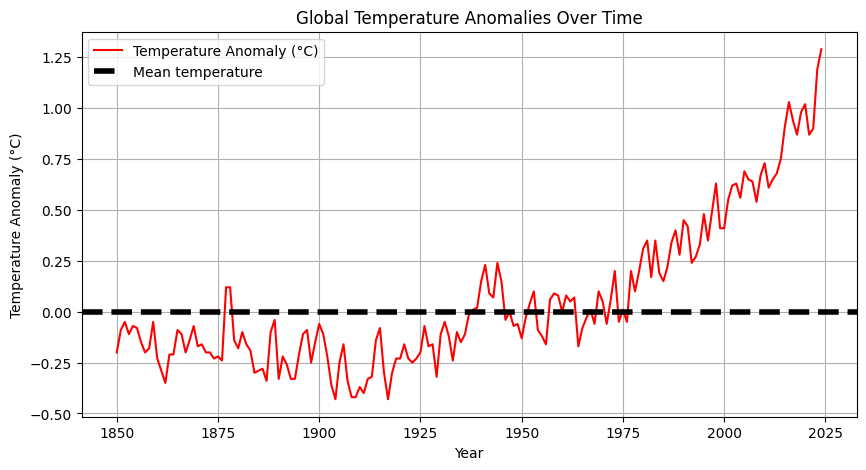

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(temperature_df["Year"], temperature_df["Anomaly"], color="red", label="Temperature Anomaly (°C)")
plt.axhline(y=0, color='black', linestyle='--',linewidth=4, label='Mean temperature')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Temperature Anomalies Over Time")
plt.legend()
plt.grid(True)
plt.show()

2. Annual CO₂ Emissions Over Time

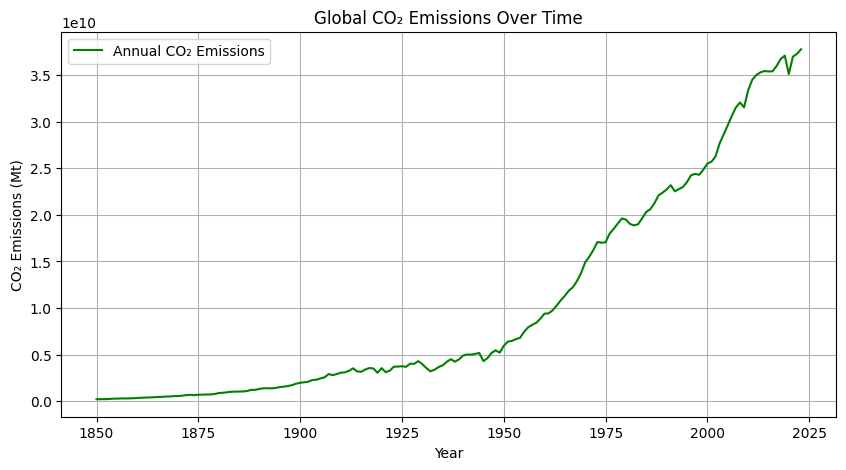

In [ ]:
year_filter_co2emissions = co2_emissions_df["Year"] >= 1850
co2_emissions_df_filtered = co2_emissions_df[year_filter_co2emissions]
plt.figure(figsize=(10, 5))
plt.plot(co2_emissions_df_filtered["Year"], co2_emissions_df_filtered["Annual CO₂ emissions"], label="Annual CO₂ Emissions", color="green")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt)")
plt.title("Global CO₂ Emissions Over Time")
plt.legend()
plt.grid(True)
plt.show()

3. CO₂ Concentration Over Time (Long-Term)

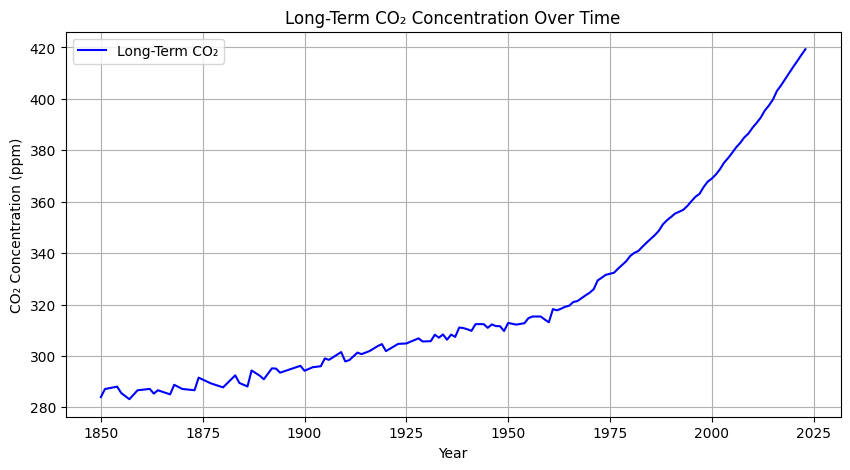

In [ ]:
year_filter_longtermco2 = long_term_co2_df["Year"] >= 1850
long_term_co2_df_filtered = long_term_co2_df[year_filter_longtermco2]
plt.figure(figsize=(10, 5))
plt.plot(long_term_co2_df_filtered["Year"], long_term_co2_df_filtered["Long-run CO₂ concentration"], label="Long-Term CO₂", color="blue")
plt.xlabel("Year")
plt.ylabel("CO₂ Concentration (ppm)")
plt.title("Long-Term CO₂ Concentration Over Time")
plt.legend()
plt.grid(True)
plt.show()

####Calculate correlation

In [ ]:
# Merge data
merged_df = temperature_df.merge(co2_emissions_df, on="Year", how="left").merge(long_term_co2_df, on="Year", how="left")
merged_df.dropna(subset=["Anomaly", "Annual CO₂ emissions", "Long-run CO₂ concentration"], inplace=True)

# Drop unnecessary columns
merged_df.drop(columns=["Entity_x", "Code_x", "Entity_y", "Code_y"], inplace=True)

# Convert Year to index for time series analysis
merged_df.set_index("Year", inplace=True)
merged_df.index = pd.to_datetime(merged_df.index, format='%Y')

merged_df.head()

,Anomaly,Annual CO₂ emissions,Long-run CO₂ concentration
Year,,,
1850-01-01,-0.20,196847600.0,284.00165
1851-01-01,-0.09,198778540.0,287.12810
1854-01-01,-0.07,255038560.0,288.05444
1855-01-01,-0.08,260259860.0,285.56558
1857-01-01,-0.20,281181060.0,283.16210


<Figure size 640x480 with 0 Axes>

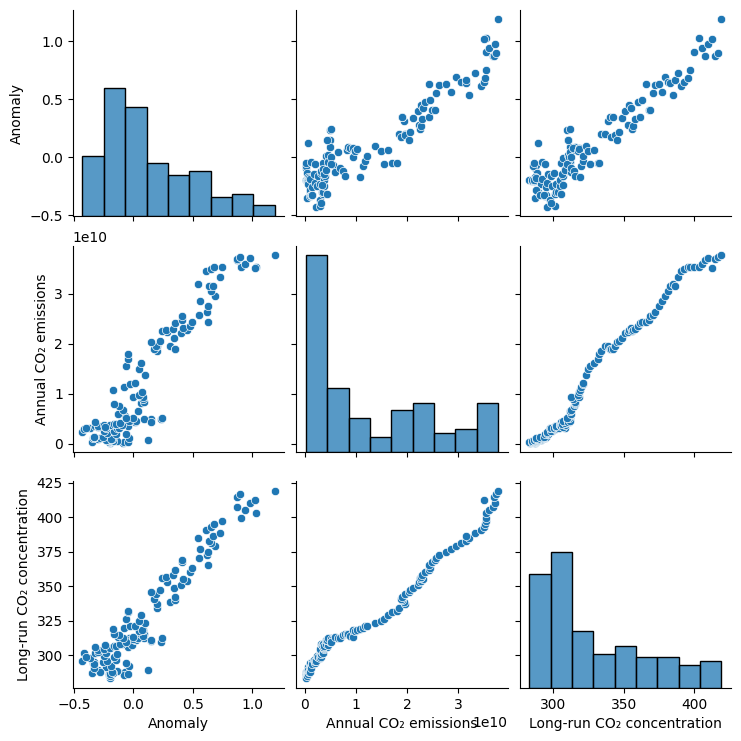

In [ ]:
# Pair plot
plt.figure()
sns.pairplot(merged_df)
plt.show()

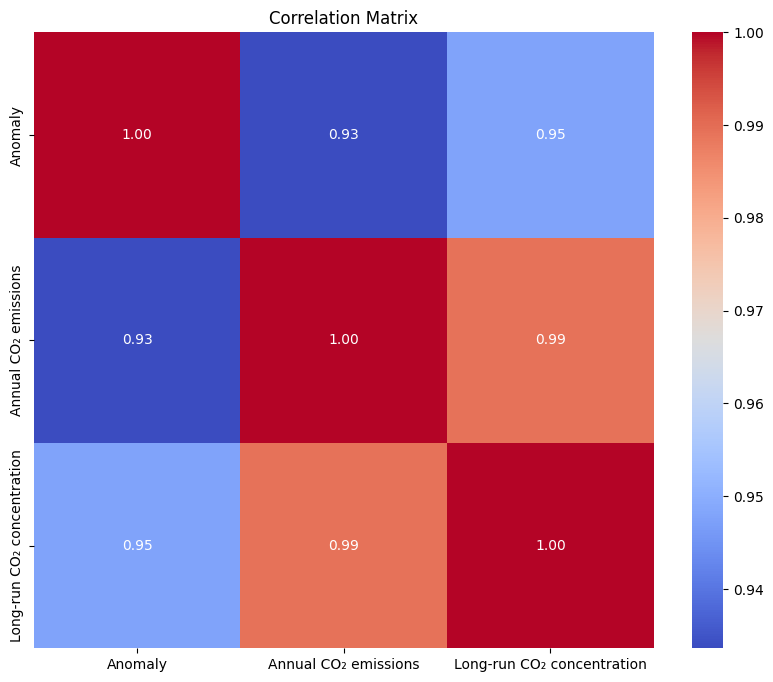

In [ ]:
# Correlation plot
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm" ,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

EDA Visualizations & Insights

Global Temperature Anomalies Over Time
* The temperature anomaly trend shows a significant increase after 1950
* The sharpest rise has occurred in the past 50 years, aligning with industrial expansion.
* Recent years (2000–present) have recorded the highest temperature anomalies.

Long-Term CO₂ Concentration Trends
*   CO₂ concentration levels remained stable for thousands of years until the Industrial Revolution (~1750).
*   The steepest CO₂ rise has occurred in the past century.
*   CO₂ levels now exceed 400 ppm, which is far beyond pre-industrial levels.

Global CO₂ Emissions Trends

*  CO₂ emissions were nearly zero before 1750, confirming human-induced emissions.
*  There is a rapid increase in emissions post-1950, aligning with fossil fuel combustion and industrial growth.
*  The highest emissions are recorded in the 21st century, reinforcing human influence on climate change.


Key Takeaways from EDA
*   There is a clear correlation between CO₂ increase and temperature rise.
*   Temperature anomalies show an accelerated rise post-1950, matching CO₂ trends.
*   Human activities (fossil fuel combustion) are strongly linked to increasing CO₂ levels
*   There is a strong correlation between CO₂ emissions and long-term CO₂ concentration levels, indicating that they are not independent of each other. Therefore, only the CO₂ emissions is selected as the feature in the model.

# Linear Regression Model using only Anthropogenic CO₂ Emissions

Regression Equation: Temperature Anomaly (°C) = 2.9270e-08 * Anthropogenic CO₂ Emissions (Gt) - 0.2548
R² Score (Training Set) : 0.876
R² Score (Testing Set) : 0.848


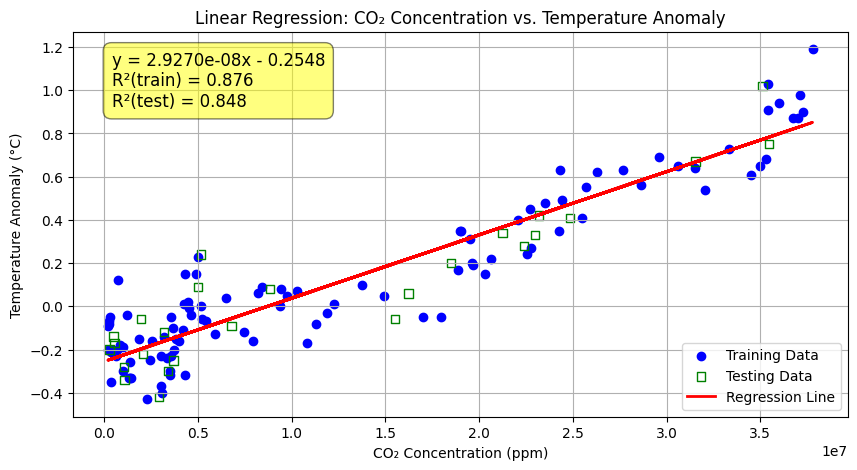

In [ ]:
# Step 1: Preprocess Data
# Convert emissions from Mt to Gt for consistency
merged_df.rename(columns={"Annual CO₂ emissions": "Annual_CO2_Emissions_Gt"}, inplace=True)
merged_df["Annual_CO2_Emissions_Gt"] /= 1e3  # Convert megatonnes (Mt) to gigatonnes (Gt)

# Extract relevant columns
X = merged_df[["Annual_CO2_Emissions_Gt"]].values.reshape(-1, 1)  # Independent variable
y = merged_df["Anomaly"].values  # Dependent variable

# Step 2: Perform Linear Regression
# Split the data into training and testing subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R² score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Step 3: Interpret Regression Results
# Extract slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print regression equation
regression_equation = f"Temperature Anomaly (°C) = {slope:.4e} * Anthropogenic CO₂ Emissions (Gt) {'+' if intercept >=0 else '-'} {abs(intercept):.4f}"
print("Regression Equation:", regression_equation)

# Print R² scores
print(f"R² Score (Training Set) : {r2_train:.3f}")
print(f"R² Score (Testing Set) : {r2_test:.3f}")

# Step 4: Visualize Regression Results

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, marker='s', facecolors='none', edgecolors='green', label="Testing Data")
plt.plot(X_train, y_pred_train, color="red", linewidth=2, label="Regression Line")
plt.xlabel("CO₂ Concentration (ppm)")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Linear Regression: CO₂ Concentration vs. Temperature Anomaly")
plt.legend(loc='lower right')
plt.grid(True)

# Display regression equation and R² value on the plot
equation_text = f"y = {slope:.4e}x {'+' if intercept >=0 else '-'} {abs(intercept):.4f}\nR²(train) = {r2_train:.3f}\nR²(test) = {r2_test:.3f}"
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords="axes fraction",
             fontsize=12, ha="left", va="top",
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.show()

# Linear Regression Model using CO₂ Concentration

Regression Equation: Temperature Anomaly (°C) = 0.0096 * CO₂ Concentration (ppm) - 3.0286
R² Score (Training Set) : 0.900
R² Score (Testing Set) : 0.887


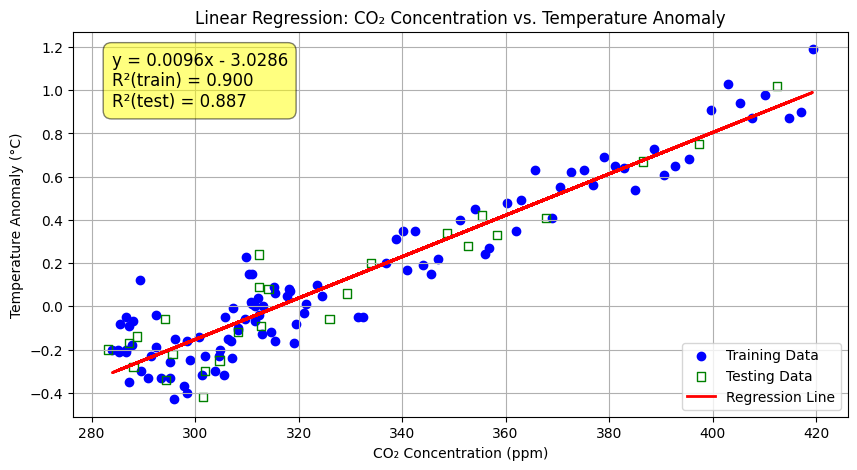

In [ ]:
# Step 1: Preprocess Data
# Extract relevant columns
X = merged_df[["Long-run CO₂ concentration"]].values.reshape(-1, 1)  # Independent variable
y = merged_df["Anomaly"].values  # Dependent variable

# Step 2: Perform Linear Regression
# Split the data into training and testing subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R² score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Step 3: Interpret Regression Results
# Extract slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print regression equation
regression_equation = f"Temperature Anomaly (°C) = {slope:.4f} * CO₂ Concentration (ppm) {'+' if intercept >=0 else '-'} {abs(intercept):.4f}"
print("Regression Equation:", regression_equation)

# Print R² scores
print(f"R² Score (Training Set) : {r2_train:.3f}")
print(f"R² Score (Testing Set) : {r2_test:.3f}")

# Step 4: Visualize Regression Results

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, marker='s', facecolors='none', edgecolors='green', label="Testing Data")
plt.plot(X_train, y_pred_train, color="red", linewidth=2, label="Regression Line")
plt.xlabel("CO₂ Concentration (ppm)")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Linear Regression: CO₂ Concentration vs. Temperature Anomaly")
plt.legend(loc='lower right')
plt.grid(True)

# Display regression equation and R² value on the plot
equation_text = f"y = {slope:.4f}x {'+' if intercept >=0 else '-'} {abs(intercept):.4f}\nR²(train) = {r2_train:.3f}\nR²(test) = {r2_test:.3f}"
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords="axes fraction",
             fontsize=12, ha="left", va="top",
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.show()

# Polynomial Regression Model using only Anthropogenic CO₂ Emissions

Polynomial Regression is an extension of Linear Regression, where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an n-th degree polynomial.

The general formula for Polynomial Regression is:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
𝛽
3
𝑋
3
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜀
Y=β
0
​
 +β
1
​
 X+β
2
​
 X
2
 +β
3
​
 X
3
 +...+β
n
​
 X
n
 +ε

Where:

𝑌
Y = Dependent variable (temperature anomaly in our case)

𝑋
X = Independent variable (CO₂ emissions in our case)

𝛽
0
,
𝛽
1
,
.
.
.
,
𝛽
𝑛
β
0
​
 ,β
1
​
 ,...,β
n
​
  = Coefficients that the model learns from the data

𝑛
n = Degree of the polynomial (determined based on model fit)

𝜀
ε = Error term (captures unexplained variance)

For example, if we use a 2nd-degree polynomial (quadratic), the equation becomes:


𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
𝜀
Y=β
0
​
 +β
1
​
 X+β
2
​
 X
2
 +ε

This equation helps in capturing the curved nature of the temperature anomaly trend instead of assuming a linear relationship.

R² Score (Training Set), k = 5 : 0.892
R² Score (Testing Set), k = 5 : 0.868
R² Score (Training Set), k = 5 : 0.884
R² Score (Testing Set), k = 5 : 0.883
R² Score (Training Set), k = 5 : 0.883
R² Score (Testing Set), k = 5 : 0.905
R² Score (Training Set), k = 5 : 0.892
R² Score (Testing Set), k = 5 : 0.865
R² Score (Training Set), k = 5 : 0.888
R² Score (Testing Set), k = 5 : 0.874
Average R² Score (Training Set) : 0.888
Average R² Score (Testing Set) : 0.879


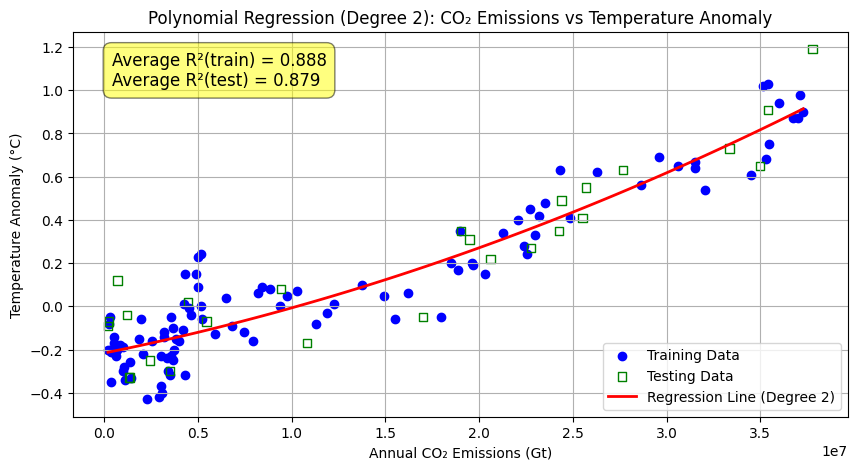

In [ ]:
# Step 1: Preprocess Data
# Extract relevant columns
X = merged_df[["Annual_CO2_Emissions_Gt"]].values.reshape(-1, 1)  # Independent variable
y = merged_df["Anomaly"].values  # Dependent variable

# Step 2: Perform Polynomial Regression (Degree 2) with K-fold validation
# Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Initialize lists to store results
r2_poly2 = []

# Perform K-fold cross validatoin
for train_index, test_index in kf.split(X):
  # Split the data into training and testing subset
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Initialize and fit the model
  poly2 = PolynomialFeatures(degree=2)
  X_poly2_train = poly2.fit_transform(X_train)
  poly2_model = LinearRegression()
  poly2_model.fit(X_poly2_train, y_train)

  # Predict y values
  y_poly2_pred_train = poly2_model.predict(X_poly2_train)
  X_poly2_test = poly2.transform(X_test)
  y_poly2_pred_test = poly2_model.predict(X_poly2_test)

  # Calculate R² score
  r2_poly2_train = r2_score(y_train, y_poly2_pred_train)
  r2_poly2_test = r2_score(y_test, y_poly2_pred_test)
  r2_scores = [r2_poly2_train, r2_poly2_test]
  r2_poly2.append(r2_scores)

  # Step 3: Interpret Regression Results
  # Print R² scores
  print(f"R² Score (Training Set), k = {kf.get_n_splits()} : {r2_poly2_train:.3f}")
  print(f"R² Score (Testing Set), k = {kf.get_n_splits()} : {r2_poly2_test:.3f}")

# Calculate and display the average R² score across all folds
r2_poly2_train_avg = np.mean([r2[0] for r2 in r2_poly2])
r2_poly2_test_avg = np.mean([r2[1] for r2 in r2_poly2])
print(f"Average R² Score (Training Set) : {r2_poly2_train_avg:.3f}")
print(f"Average R² Score (Testing Set) : {r2_poly2_test_avg:.3f}")

# Step 4: Visualize Regression Results

# Generate smooth range of X values for plotting the polynomial curve
X_range = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
X_poly_range = poly2.transform(X_range)
y_poly = poly2_model.predict(X_poly_range)

# Scatter plot of actual data points
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, marker='s', facecolors='none', edgecolors='green', label="Testing Data")
plt.plot(X_range, y_poly, color="red", linewidth=2, label="Regression Line (Degree 2)")
plt.xlabel("Annual CO₂ Emissions (Gt)")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Polynomial Regression (Degree 2): CO₂ Emissions vs Temperature Anomaly")
plt.legend(loc='lower right')
plt.grid(True)

# Display regression equation and R² value on the plot
equation_text = f"Average R²(train) = {r2_poly2_train_avg:.3f}\nAverage R²(test) = {r2_poly2_test_avg:.3f}"
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords="axes fraction",
             fontsize=12, ha="left", va="top",
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.show()

# Time Series Forecasting (ARIMA) for CO₂ Emissions

ARIMA is a time series forecasting model that consists of three components:

AutoRegressive (AR): Uses past values to predict the future.
Integrated (I): Differencing is applied to make the data stationary.
Moving Average (MA): Uses past errors to improve predictions.
The general form of an ARIMA(p, d, q) model is:

𝑌
𝑡
=
𝜙
1
𝑌
𝑡
−
1
+
𝜙
2
𝑌
𝑡
−
2
+
.
.
.
+
𝜙
𝑝
𝑌
𝑡
−
𝑝
+
𝜃
1
𝜀
𝑡
−
1
+
𝜃
2
𝜀
𝑡
−
2
+
.
.
.
+
𝜃
𝑞
𝜀
𝑡
−
𝑞
+
𝐶
+
𝜀
𝑡
Y
t
​
 =ϕ
1
​
 Y
t−1
​
 +ϕ
2
​
 Y
t−2
​
 +...+ϕ
p
​
 Y
t−p
​
 +θ
1
​
 ε
t−1
​
 +θ
2
​
 ε
t−2
​
 +...+θ
q
​
 ε
t−q
​
 +C+ε
t
​


Where:


𝑌
𝑡
Y
t
​
  = Value of the time series at time

𝑡
t (temperature anomaly at time
𝑡
t)

𝜙
1
,
𝜙
2
,
.
.
.
,
𝜙
𝑝
ϕ
1
​
 ,ϕ
2
​
 ,...,ϕ

p
​
  = Coefficients for the AutoRegressive (AR) terms

𝑌
𝑡
−
1
,
𝑌
𝑡
−
2
,
.
.
.
,
𝑌
𝑡
−
𝑝
Y
t−1
​
 ,Y
t−2
​
 ,...,Y
t−p
​
  = Past observations

𝜃
1
,
𝜃
2
,
.
.
.
,
𝜃
𝑞
θ
1
​
 ,θ
2
​
 ,...,θ

q
​
  = Coefficients for the Moving Average (MA) terms

𝜀
𝑡
ε
t
​
  = Error term (white noise)

𝑝
p = Number of AR terms (lags of

𝑌
𝑡
Y
t
​
 )
𝑑
d = Number of times the series is differenced to achieve stationarity

𝑞
q = Number of MA terms (lags of the error term)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

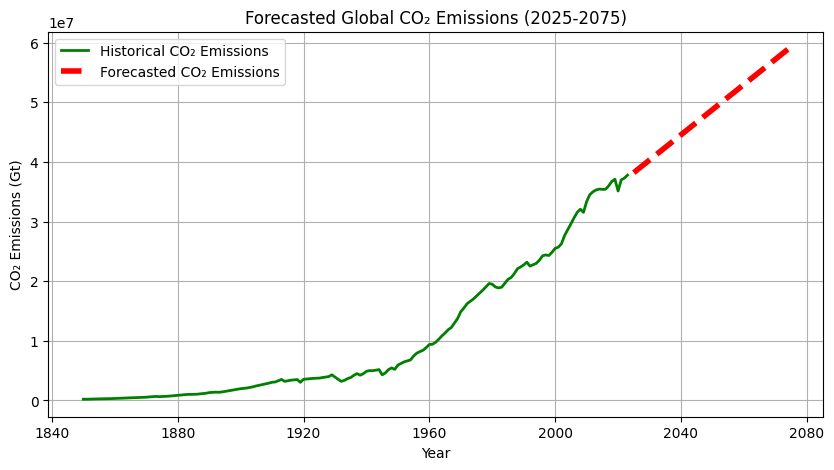

In [ ]:
# Extract CO₂ emissions as a time series
co2_emissions_series = merged_df["Annual_CO2_Emissions_Gt"]

# Fit ARIMA model (best order found: (0,2,1))
final_arima_model = ARIMA(co2_emissions_series, order=(0,2,1)).fit()

# Forecast CO₂ emissions for the next 50 years (2025-2075)
forecast_years = 50
future_years = pd.date_range(start=co2_emissions_series.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='YE')
future_emissions_forecast = final_arima_model.forecast(steps=forecast_years)

# Create DataFrame for forecasted CO₂ emissions
future_emissions_df = pd.DataFrame({"Year": future_years, "Predicted_CO2_Emissions": future_emissions_forecast})
future_emissions_df.set_index("Year", inplace=True)

# Plot CO₂ Emissions Forecast
plt.figure(figsize=(10, 5))
plt.plot(merged_df.index, merged_df["Annual_CO2_Emissions_Gt"], label="Historical CO₂ Emissions", color="green", linewidth=2)
plt.plot(future_emissions_df.index, future_emissions_df["Predicted_CO2_Emissions"], label="Forecasted CO₂ Emissions", color="red", linestyle='--',linewidth=4)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Gt)")
plt.title("Forecasted Global CO₂ Emissions (2025-2075)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Predict Future Temperature Anomalies

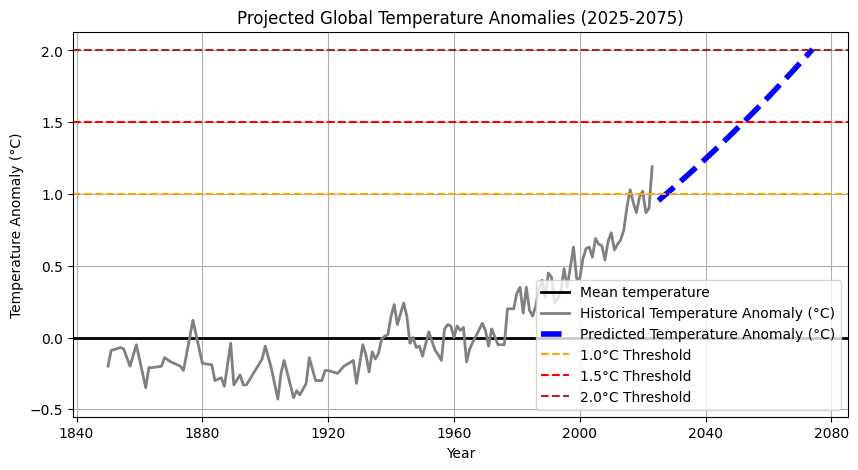

Results:
Global temperature will increase by 1.0°C by Year 2027
Global temperature will increase by 1.5°C by Year 2052
Global temperature will increase by 2.0°C by Year 2073
            Predicted_CO2_Emissions  Poly2_Temperature_Anomaly
Year                                                          
2024-12-31             3.821398e+07                   0.954362
2025-12-31             3.863638e+07                   0.972927
2026-12-31             3.905879e+07                   0.991614
2027-12-31             3.948119e+07                   1.010424
2028-12-31             3.990360e+07                   1.029358
2029-12-31             4.032601e+07                   1.048414
2030-12-31             4.074841e+07                   1.067594
2031-12-31             4.117082e+07                   1.086896
2032-12-31             4.159322e+07                   1.106321
2033-12-31             4.201563e+07                   1.125870


In [ ]:
# Predict Future Temperature Anomalies using Polynomial Regression (Degree 2)
X_future = future_emissions_df[["Predicted_CO2_Emissions"]].values
future_emissions_df["Poly2_Temperature_Anomaly"] = poly2_model.predict(poly2.transform(X_future))

# Compare with IPCC Projections
thresholds = [1.0, 1.5, 2.0]

threshold_years = {}
for threshold in thresholds:
    threshold_years[f"{threshold}°C"] = future_emissions_df[future_emissions_df["Poly2_Temperature_Anomaly"] >= threshold].head(1).index

# Convert results to readable format
for key in threshold_years.keys():
    threshold_years[key] = threshold_years[key][0] if threshold_years[key].size > 0 else "Not reached"

# Plot Temperature Anomaly Forecast
plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='black', linestyle='-',linewidth=2, label='Mean temperature')
plt.plot(merged_df.index, merged_df['Anomaly'], label="Historical Temperature Anomaly (°C)", color="grey", linestyle='-', linewidth=2)
plt.plot(future_emissions_df.index, future_emissions_df["Poly2_Temperature_Anomaly"], label="Predicted Temperature Anomaly (°C)", color="blue", linestyle='--', linewidth=4)
plt.axhline(y=1.0, color='orange', linestyle='--', label="1.0°C Threshold")
plt.axhline(y=1.5, color='red', linestyle='--', label="1.5°C Threshold")
plt.axhline(y=2.0, color='brown', linestyle='--', label="2.0°C Threshold")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Projected Global Temperature Anomalies (2025-2075)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Results
print("Results:")
for key in threshold_years.keys():
    print(f"Global temperature will increase by {key} by Year {threshold_years[key]:%Y}")

print(future_emissions_df.head(10))  # Display first 10 rows
future_emissions_df.to_csv("forecasted_temperature_anomalies.csv", index=True)